# Fit **muon** signal channel to get the resolution (two asymetric gaussian using root framework)

<font color='red'>The root file has all the cuts</font> 

In [1]:
import glob

In [2]:
import numpy as np
import os

In [3]:
import ROOT

Welcome to JupyROOT 6.26/02


In [4]:
signal_sample = 'muon' #'muon'
samples_files = 'b'
treename = "treevpho"

In [5]:
signal='/home/marcela/Documents/mc14_lgamma/limit/roots/AfterCuts_mc14_muon_test_lineasno.root'

In [6]:
min_x = 1.64 #1.5
max_x = 1.82#2.0

In [7]:
#RooRealVar definition
x = ROOT.RooRealVar('tau_sig_InvM', 'tau_sig_InvM', min_x, max_x, 'GeV/c^{2}')

Open the file and save the var in the variable data as a RooDataSet for the fit

In [8]:
f = ROOT.TFile.Open(signal)

In [9]:
t = f.Get("treevpho")

In [10]:
data = ROOT.RooDataSet("data","data",ROOT.RooArgSet(x), Import=t)

Specifying the ranges for the other RooRealVar for the two asymetric gaussians

In [11]:
i_mean= 1.777
meanmin= 1.7
meanmax= 1.85

i_sigma= 0.016
i_sigma2= 0.014

i_sigma3= 0.03
i_sigma4= 0.01

i_sigma5= 0.01

sigmamin=0.001
sigmamax=0.08 

sigmamin4=0.009
sigmamax4=0.2

sigmamin3=0.01
sigmamax3=0.2

In [12]:
mean = ROOT.RooRealVar("mean","mean",i_mean,meanmin,meanmax)

sigma = ROOT.RooRealVar("sigma","sigma",i_sigma,sigmamin,sigmamax)
sigma2 = ROOT.RooRealVar("sigma2","sigma2",i_sigma2,sigmamin,sigmamax)

sigma3 = ROOT.RooRealVar("sigma3","sigma3",i_sigma3,sigmamin,sigmamax)
sigma4 = ROOT.RooRealVar("sigma4","sigma4",i_sigma4,sigmamin,sigmamax)

sigma5 = ROOT.RooRealVar("sigma5","sigma5",i_sigma5,sigmamin,sigmamax)

### Let's make the fit an save the results in fit

In [13]:
model_1 = ROOT.RooBifurGauss("md1","md1",x,mean,sigma, sigma2) #model_1
model_2 = ROOT.RooBifurGauss("md2","md2",x,mean,sigma3, sigma4)
f1 = ROOT.RooRealVar("f1","fraction",0.4,0.0,1.0)
model2 = ROOT.RooAddPdf("model","md1+md2",ROOT.RooArgList(model_1,model_2),ROOT.RooArgList(f1)) #model
fit = model2.fitTo(data,ROOT.RooFit.PrintLevel(-1))

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (md1,md2)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Let's display the results in a plot

In [14]:
from ROOT import TCanvas, TPad, TFile, TPaveLabel, TPaveText, TLine
c1 = TCanvas( 'c1', 'Fit', 1100, 1200 )

In [15]:
pad1 = TPad('pad1', 'pad1', 0.09, 0.23, 1.0 , 0.95) #,1 )
pad1.Draw()
pad2 = TPad('pad2', 'pad2',0.09, 0.0, 1.0, 0.23)
pad2.Draw()

The models are include and the final results of the parameters in the plot, additionally, the pull is included in the pad2 

-----------------parameters---------------
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (md1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (md2)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()


Info in <TCanvas::Print>: png file bifurmodel_muon_aftercuts_testall_signalstrategy.png has been created


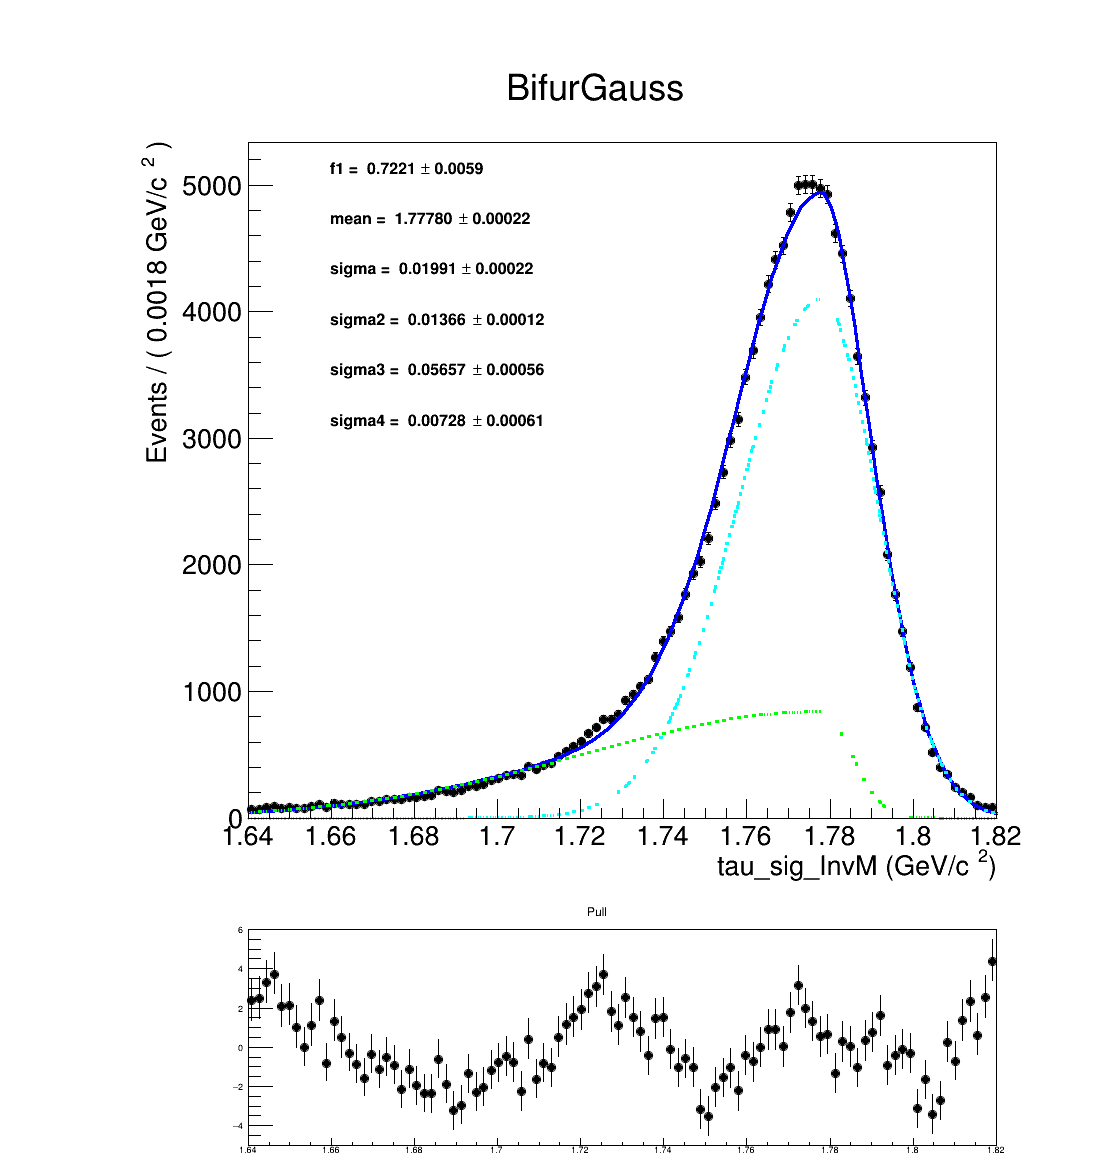

In [16]:
pad1.cd()
xframe = x.frame(ROOT.RooFit.Title("BifurGauss"))
data.plotOn(xframe,ROOT.RooFit.Binning(100))
model2.plotOn(xframe)
hpull = xframe.pullHist();

model2.plotOn(
    xframe,
    ROOT.RooFit.Components("md1"),
    ROOT.RooFit.LineStyle(
        ROOT.kDotted),
    ROOT.RooFit.LineColor(
        ROOT.kCyan))
model2.plotOn(
    xframe,
    ROOT.RooFit.Components("md2"),
    ROOT.RooFit.LineStyle(
        ROOT.kDotted),
    ROOT.RooFit.LineColor(
        ROOT.kGreen))

model2.paramOn(xframe,
            ROOT.RooFit.Layout(0.22, 0.47, 0.9))
xframe.getAttText().SetTextSize(0.02)

ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.65)
xframe.Draw()

fpull = x.frame(ROOT.RooFit.Title("Pull"))
fpull.addPlotable(hpull,"PZ")


pad2.cd()
ROOT.gPad.SetLeftMargin(0.15)
fpull.GetXaxis().SetTitle(" ")
fpull.Draw()

c1.Draw()
c1.Print("bifurmodel_muon_aftercuts_testall_signalstrategy.png")
print("-----------------parameters---------------")

In [17]:
sigma_left = np.sqrt(((sigma.getVal()*sigma.getVal()*f1.getVal())+(sigma3.getVal()*sigma3.getVal()*(1-f1.getVal()))))
sigma_right = np.sqrt(((sigma2.getVal()*sigma2.getVal()*f1.getVal())+(sigma4.getVal()*sigma4.getVal()*(1-f1.getVal()))))
Left_ext = np.absolute(mean.getVal() - min_x)/sigma_left;
Right_ext = np.absolute(max_x - mean.getVal())/sigma_right;
print("sigma_left: ", sigma_left)
print("sigma_right: ",sigma_right)
print("-----------------")
print("sigma_left MeV: ", round(sigma_left*1000,2))
print("sigma_right MeV: ",round(sigma_right*1000,2))
print("-----------------")
print("mean", mean.getVal())
print("-----------------")

sigma_left:  0.03428696830424737
sigma_right:  0.01222215223618718
-----------------
sigma_left MeV:  34.29
sigma_right MeV:  12.22
-----------------
mean 1.7777989487739763
-----------------


Print the diferent regions for 3,5,10,20 sigmas

In [18]:
for k in [3,5,10,20]:
    print(f"---------{k} sigmas region--------")
    print(-sigma_left*k+mean.getVal())
    print(sigma_right*k+mean.getVal())
    print("-----------------")

---------3 sigmas region--------
1.6749380438612342
1.8144654054825378
-----------------
---------5 sigmas region--------
1.6063641072527395
1.838909709954912
-----------------
---------10 sigmas region--------
1.4349292657315025
1.9000204711358482
-----------------
---------20 sigmas region--------
1.092059582689029
2.02224199349772
-----------------
